<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_tasks/blob/main/HW_2_2_2_Logistic_regression_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/edce80b5bb02479085855b2334b17fc1). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olena2023
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 277MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-3/bank-customer-churn-prediction-dlu-course-c-3.zip to ./bank-customer-churn-prediction-dlu-course-c-3


In [3]:
import os
data_dir = './bank-customer-churn-prediction-dlu-course-c-3'
!ls

bank-customer-churn-prediction-dlu-course-c-3  sample_data


In [4]:
os.listdir(data_dir)

['train.csv', 'sample_submission.csv', 'test.csv']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [6]:
df_train = pd.read_csv('/content/bank-customer-churn-prediction-dlu-course-c-3/train.csv')
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [8]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, stratify = df_train['Exited'], test_size=0.2, random_state=42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (12000, 14)
val_df.shape : (3000, 14)


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [9]:
input_cols = list(train_df.columns)[3:-1]
target_col = 'Exited'
print(input_cols)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [10]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [11]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [12]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [13]:
numeric_cols, categorical_cols

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender'])

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.54,0.35,0.50,0.21,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.29,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.34,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.43,0.70,0.52,0.33,1.00,1.00,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop =  'first', sparse_output=False, handle_unknown='infrequent_if_exist')
encoder.fit(train_inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [16]:
display(train_inputs.head()), display(val_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,0.0,0.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,1.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,1.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,0.0,0.0,1.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,1.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,0.0,0.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,0.0,0.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,1.0,0.0


(None, None)

1. Пропущених значень немає.
2. Масштабування виконане за допомогою MinMaxScaler.
3. Кодування категоріальних ознак з OneHotEncoder, drop =  'first' запобігає мультиколінеарності даних.
4. Ознаки: 'id', 'CustomerId', 'Surname' для моделі не потрібні

5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [17]:
!pip install pyarrow --quiet

In [18]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (12000, 13)
train_targets: (12000,)
val_inputs: (3000, 13)
val_targets: (3000,)


In [19]:
! ls

bank-customer-churn-prediction-dlu-course-c-3  train_targets.parquet
sample_data				       val_inputs.parquet
train_inputs.parquet			       val_targets.parquet


6. З підготовлених вхідних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [21]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

model.fit(X_train, train_targets)

train_preds = model.predict(X_train)  # передбачення моделі на тренувальних даних
val_preds = model.predict(X_val)      # передбачення моделі на валідаційних даних

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якість моделі? Вона хороша, погана, задовільна?

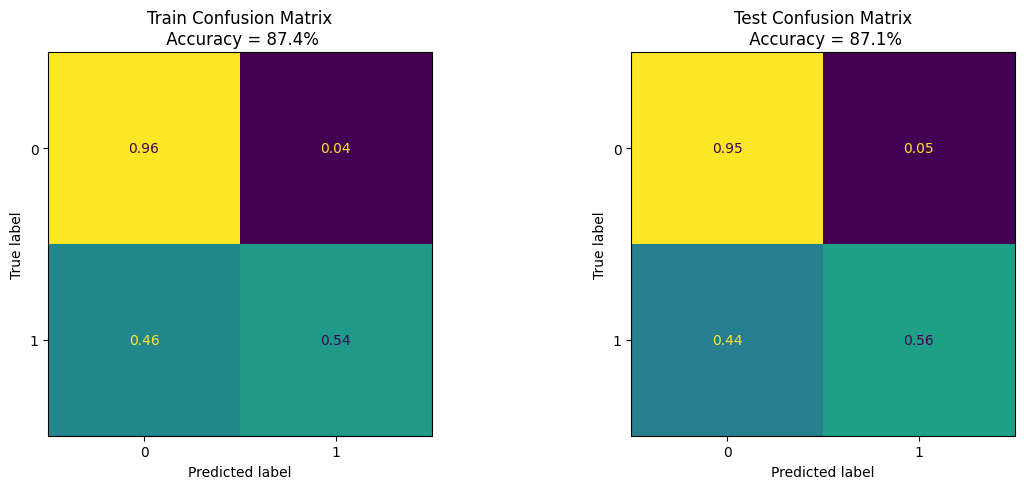

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

# Обчислюємо матриці і метрики
cm_train = confusion_matrix(train_targets, train_preds, normalize='true')
cm_test = confusion_matrix(val_targets, val_preds, normalize='true')

accuracy_train = round(accuracy_score(train_targets, train_preds), 3)
accuracy_test = round(accuracy_score(val_targets, val_preds), 3)

# Малюємо поруч
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(cm_train).plot(ax=axes[0], colorbar=False)
axes[0].set_title(f'Train Confusion Matrix\n Accuracy = {accuracy_train * 100}%')

ConfusionMatrixDisplay(cm_test).plot(ax=axes[1], colorbar=False)
axes[1].set_title(f'Test Confusion Matrix\n Accuracy = {accuracy_test * 100}%')

plt.tight_layout()
plt.show()

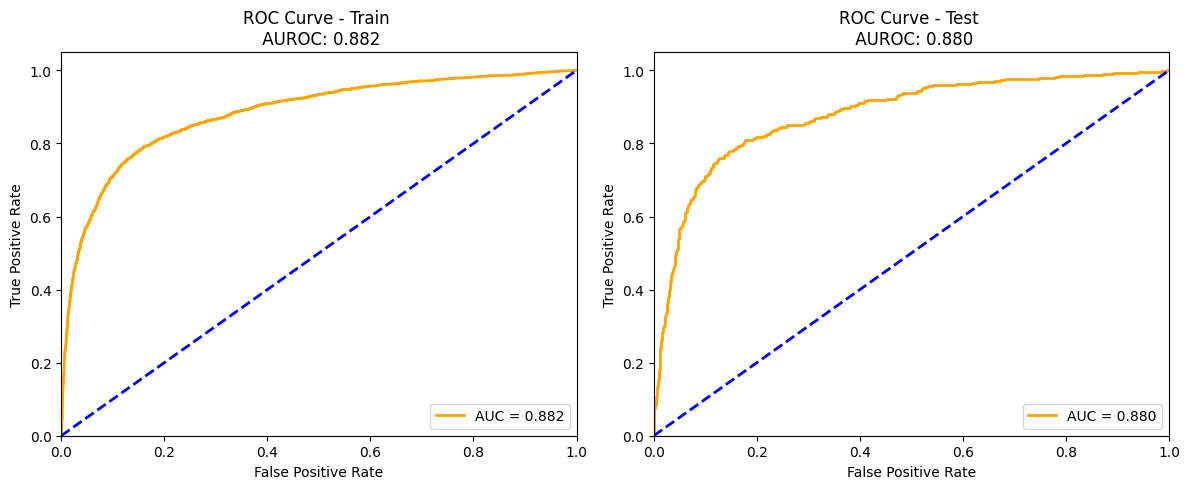

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ймовірності для train і test
y_pred_proba_train = model.predict_proba(X_train)[:, 1]
y_pred_proba_test = model.predict_proba(X_val)[:, 1]

# ROC для train
fpr_train, tpr_train, _ = roc_curve(train_targets, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC для test
fpr_test, tpr_test, _ = roc_curve(val_targets, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Створюємо два графіки поруч
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC train
axes[0].plot(fpr_train, tpr_train, color='orange', lw=2, label=f'AUC = {roc_auc_train:.3f}')
axes[0].plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title(f'ROC Curve - Train \n AUROC: {roc_auc_train:.3f}')
axes[0].legend(loc="lower right")

# ROC test
axes[1].plot(fpr_test, tpr_test, color='orange', lw=2, label=f'AUC = {roc_auc_test:.3f}')
axes[1].plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title(f'ROC Curve - Test \n AUROC: {roc_auc_test:.3f}')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import f1_score

def get_f1_score(inputs, targets, name='', threshold = 0.5):
  y_pred_proba = model.predict_proba(inputs)[:, 1]
  y_pred_05 = (y_pred_proba >= threshold).astype(int)

  f1_score_ = f1_score(targets, y_pred_05)
  print(f"F1 score {name}: {f1_score_:.3f}")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.636
F1 score Validation: 0.640


**Висновки**:

Модель демонструє стабільну якість на навчальній і валідаційній вибірках:

Accuracy: 0.874 (train) і 0.871 (validation)

AUC: 0.882 (train) і 0.880 (validation)

F1-score: 0.636 (train) і 0.640 (validation)

Значення усіх метрик для моделі на навчальних та валідаційних даних відповідно білизькі між собою, це означає що модель добре узагальнює закономірності і ймовірно має хорошу здатність прогнозувати на нових даних.



8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [25]:
df_train['Exited'].value_counts()

,count
Exited,
0.0,11948
1.0,3052


In [26]:
def all_zero(inputs):
    return np.full(len(inputs), 0)

round(accuracy_score(train_targets, all_zero(X_train)),2)

0.8

**Висновки:**

Розподіл цільової змінної:

0.0 (негативний клас): 11,948 спостережень (~79.6%)

1.0 (позитивний клас): 3,052 спостереження (~20.4%)

Класи суттєво незбалансовані (≈ 80% проти 20%).

Accuracy ≈ 87% виглядає добре, але це може бути оманливо, бо навіть наївна модель, яка завжди прогнозує 0, давала б accuracy ≈ 80%.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [27]:
import joblib

bank_customer = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [28]:
joblib.dump(bank_customer, 'log_reg.joblib')

['log_reg.joblib']

In [29]:
model2 = joblib.load('log_reg.joblib')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [30]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [31]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, df_train[:5])

array([0.00654061, 0.03718968, 0.37048522, 0.37298355, 0.97568626])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [32]:
test_raw_df = pd.read_csv('/content/bank-customer-churn-prediction-dlu-course-c-3/test.csv')

In [33]:
test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [34]:
df_samle = pd.read_csv('/content/bank-customer-churn-prediction-dlu-course-c-3/sample_submission.csv')

In [35]:
df_samle['Exited'] = test_raw_df['Exited']

In [36]:
df_samle.head()

,id,Exited
0,15000,0.075409
1,15001,0.035663
2,15002,0.152497
3,15003,0.193055
4,15004,0.055188


In [37]:
df_samle.to_csv('/content/bank-customer-churn-prediction-dlu-course-c-3/submission_log_reg.csv', index=False)

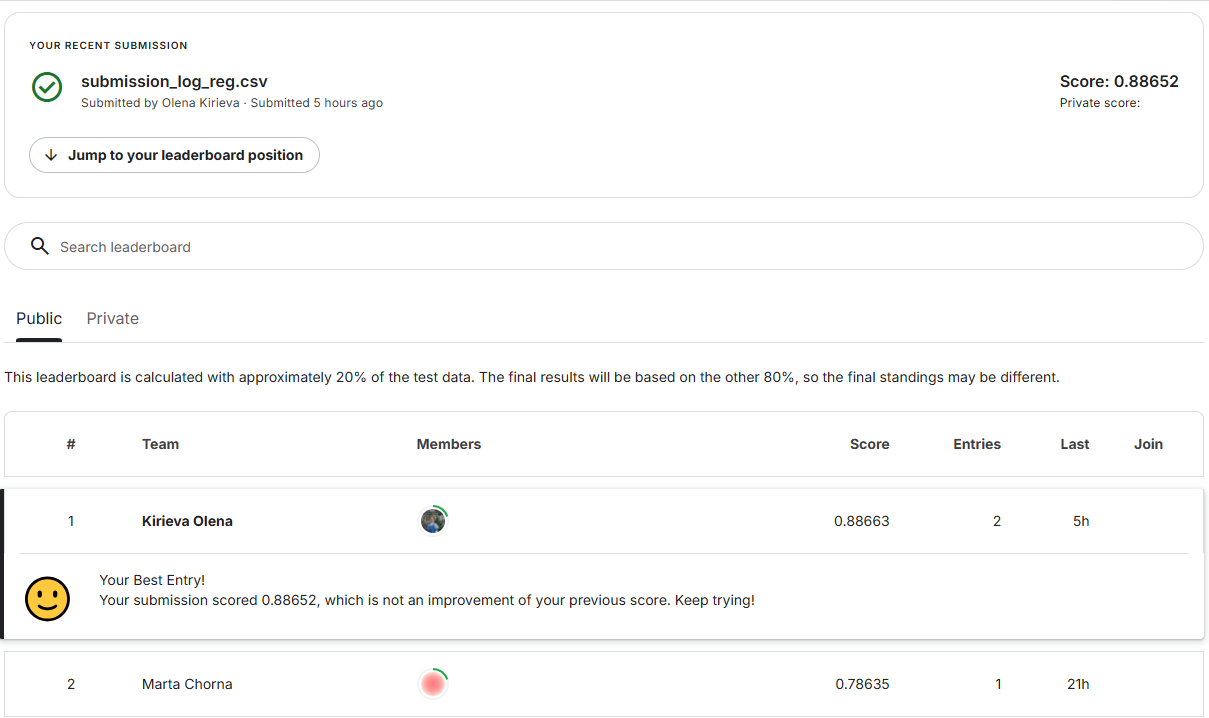